In [454]:
import numpy as np
import matplotlib.pyplot as plt

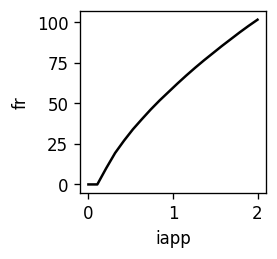

In [455]:
# read firing rate for pv
pv_rate, ics = [], []
with open("./pv_firing_rate_mpi.txt", "r") as fid:
    line = fid.readline()
    while line:
        tmp = line.split(":")
        x1,x2,x3 = [float(x) for x in tmp[0].split(",")]
        val = float(tmp[1][:-1])
        line = fid.readline()
        
        pv_rate.append(val)
        ics.append(x3)
pv_rate = np.array(pv_rate)
    
plt.figure(dpi=120, figsize=(2,2))
plt.plot(ics, pv_rate, "k")
plt.ylabel("fr")
plt.xlabel("iapp")
plt.show()

In [28]:
def read_firing_rate(fname_out, fname_param):
    
    # read parameters
    param_names = []
    params = []
    with open(fname_param, "r") as fid:
        line = fid.readline()
        while line:
            tmp = line.split(":")
            param_names.append(tmp[0])
            params.append([float(x) for x in tmp[1].split(",")[:-1]])
            line = fid.readline()
    
    # read result
    sz = [len(p) for p in params]
    frs = np.zeros(sz)
    with open(fname_out, "r") as fid:
        line = fid.readline()
        while line:
            tmp = line.split(":")
            # read idx
            nid = [int(n) for n in tmp[0].split(",")]
            # frs[nid] = float(tmp[1])
            frs[nid[0],nid[1],nid[2],nid[3],nid[4]] = float(tmp[1])
            line = fid.readline()
            
    return frs, params, param_names

In [456]:
frs, params, param_names = read_firing_rate("./firing_rate_mpi.txt", "params.txt")

In [457]:
print(param_names)
dfr = frs - pv_rate.reshape([1,1,1,1,-1])

['cm', 'gl', 'gk', 'gna', 'ic']


In [466]:
# find pv > 0
nid = np.where(pv_rate > 1)[0][0]
print(nid)

# condition
cond = (dfr[:,:,:,:,nid-1] > 0) & (frs[:,:,:,:,-1] > 0) & (frs[:,:,:,:,0] < 1e-10)
# cond = frs[:,:,:,:,-1] > 0
for n in range(nid+5,dfr.shape[-1]):
    cond = cond & (dfr[:,:,:,:,n] < 0)
cond = cond & (dfr[:,:,:,:,-1] < -40)

2


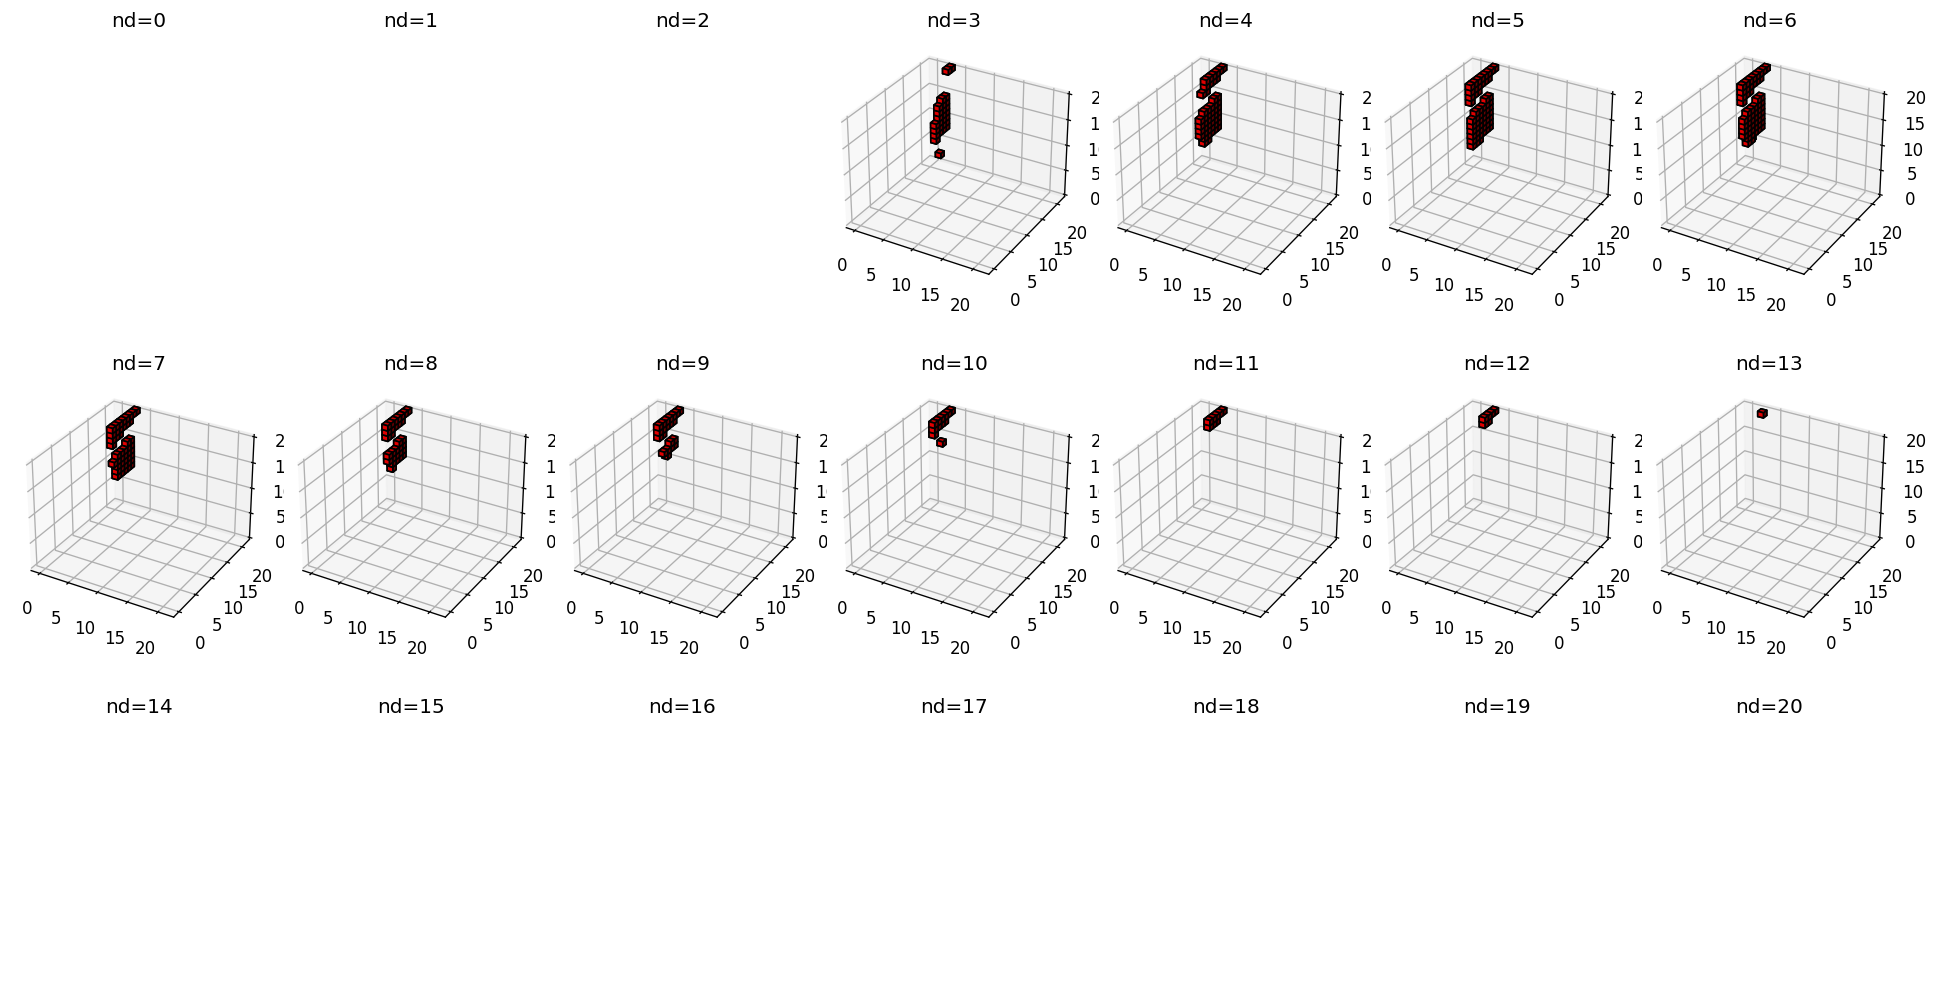

In [467]:
%matplotlib inline

tune_ids = []
x, y = np.meshgrid(np.arange(21), np.arange(21))

fig = plt.figure(dpi=120, figsize=(16,9))
for nd in range(21):
    ax = fig.add_subplot(3,7,nd+1,projection='3d')
    
    vox = cond[nd,:,:,:]
    colors = np.empty(list(vox.shape)+[3], dtype=object)
    colors[vox] = [1,0,0]
    vox_obj = ax.voxels(vox, facecolors=colors, edgecolor='k')
    
    ax.set_zlim([0, 20])
    ax.set_title("nd=%d"%(nd))
    
    for k in vox_obj.keys():
        # print(f"nd:{nd}\tn0:{k[0]}\tn1:{k[1]}\tn2:{k[2]}\t-> cm:{params[0][nd]:.2f}, gl:{params[1][k[0]]:.2f}, gk:{params[2][k[1]]:.2f}, gna:{params[3][k[2]]:.2f}")
        tune_ids.append([nd]+list(k))
    if len(vox_obj.keys()) == 0:
        ax.axis('off')
    
plt.tight_layout()
plt.savefig("./small&lts_cond_voxel.png")
plt.show()

# cm: 1, gl: 0.1, gk: 9, gna: 35


# x:gk y: gl, z: gna

2.0 0.109 19.85 60.0


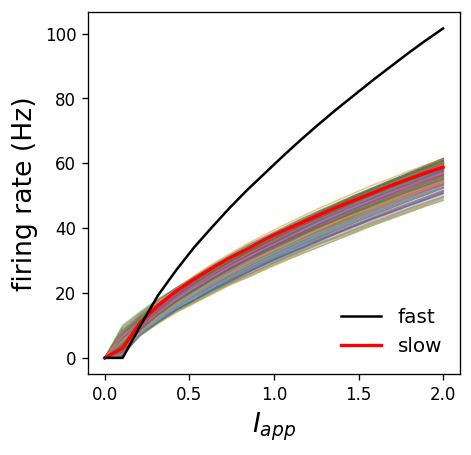

In [497]:
## sample figure
# nd:20	n0:4	n1:20	n2:10	-> cm:1.50, gl:0.11, gk:15.00, gna:55.00
# nid = tune_ids[10]
nid = [5, 2, 13, 10]
print(params[0][nid[0]], params[1][nid[1]], params[2][nid[2]], params[3][nid[3]])

plt.figure(dpi=120, figsize=(4,4))
plt.plot(ics, pv_rate, 'k', zorder=100, label='fast')
for nid in tune_ids:
    plt.plot(ics, frs[nid[0],nid[1],nid[2],nid[3]], lw=1, alpha=0.5)
    
plt.plot(ics, frs[nid[0],nid[1],nid[2],nid[3]], c='r', lw=2, label='slow')

plt.xlabel(r"$I_{app}$", fontsize=16)
plt.ylabel("firing rate (Hz)", fontsize=16)
plt.legend(loc="lower right", fontsize=12, edgecolor='none')

# plt.xlim([0, 0.4])
# plt.ylim([0, 20])
plt.savefig("./small&lts_cond_fr.png")
plt.show()

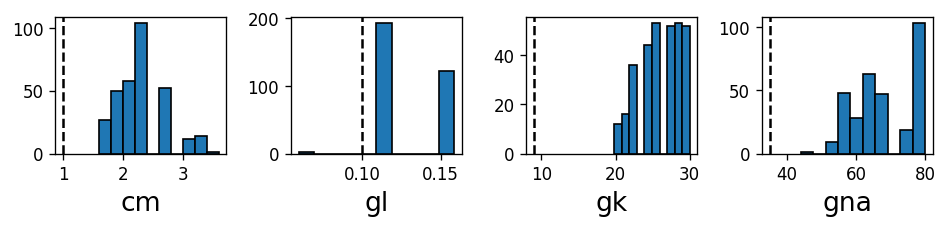

In [498]:
possible_params = [[], [], [], []]
for nid in tune_ids:
    for i in range(4):
        possible_params[i].append(params[i][nid[i]])
# cm: 1, gl: 0.1, gk: 9, gna: 35        
pv_params = [1, 0.1, 9, 35]
        
fig, axs = plt.subplots(1,4, dpi=120, figsize=(8, 2))
for i in range(4):
    plt.axes(axs[i])
    plt.hist(possible_params[i], edgecolor='k')
    plt.xlabel(param_names[i], fontsize=16)
    # plt.xlim([params[i][0], params[i][-1]])
    
    yl = plt.ylim()
    plt.plot([pv_params[i], pv_params[i]], yl, 'k--')
    plt.ylim(yl)
    
plt.tight_layout()
plt.savefig("./small&lts_cond_params.png")
plt.show()

In [482]:
params[3][10]

60.0

In [163]:
tune_id = [nid[0], nid[1], 19, nd]
for n in range(4):
    print(f"{param_names[n]}: {params[n][tune_id[n]]}")


cm: 1.45
gl: 0.108
gk: 14.4
gna: 47.5


In [153]:
# original
cm: 

5

In [152]:
nid

[19, 3]

In [151]:
tune_id[n]

19

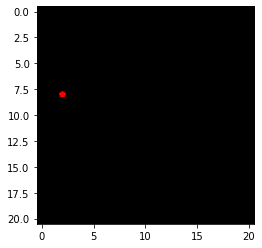

In [74]:
nid = [8, 2]
plt.imshow(cond[:,:,0,0], cmap="gray")
plt.plot(nid[1], nid[0], 'rp')
plt.show()

In [ ]:
dfr = fr - fr_pv
cl = [-50, 50]
nid = [15, 15]

%matplotlib ipympl
x, y = np.meshgrid(xs[0], xs[1])

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')

for n in range(20):
    ax.contourf(x, y, dfr[:,:,n], 30, zdir='z', offset=xs[2][n], cmap='seismic', vmax=cl[1], vmin=cl[0], alpha=0.5)
# ax.set_zlim([0., 1.])
# ax.plot([1.5,1.5],[14,14], [0,2], c='k', lw=2)

x0, x1 = xs[0][nid[0]], xs[1][nid[1]]
ax.plot([x0, x0], [x1, x1], [-0.1, 2.1], c='k', lw=1.5)
print(x0, x1)

ax.set_zlim([xs[2][0], xs[2][-1]])
plt.xlabel(r"$C_m$", fontsize=15)
plt.ylabel(r"$g_K$", fontsize=15)
ax.set_zlabel(r"$I_{app}$", fontsize=15)
plt.xlim([1, 1.5])
plt.ylim([8, 15])
plt.show()

plt.figure(dpi=80, figsize=(6, 1))
plt.imshow(np.arange(cl[0], cl[1]).reshape([1, -1]), aspect='auto', extent=[cl[0], cl[1], 0, 1], cmap="seismic")
plt.tight_layout()
plt.xticks([cl[0], 0, cl[1]])
plt.show()

In [68]:
pv_rate.shape

(20,)

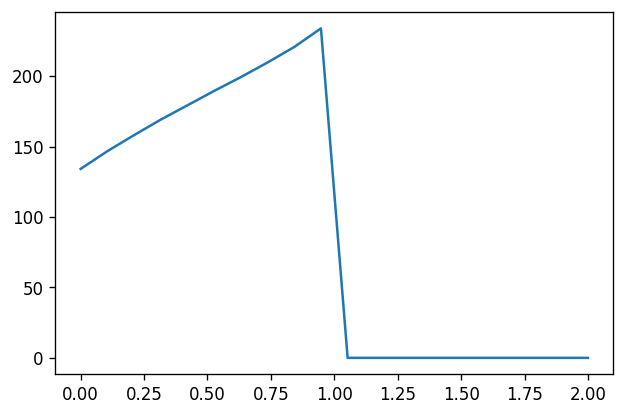

In [69]:
plt.figure(dpi=120, figsize=(6, 4))
plt.plot(params[-1], frs[nid[0],nid[1],0,0,:])

In [ ]:
# %matplotlib ipympl
x, y = np.meshgrid(xs[0], xs[1])

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')

for n in range(20):
    ax.contourf(x, y, dfr[:,:,n], 30, zdir='z', offset=xs[2][n], cmap='seismic', vmax=cl[1], vmin=cl[0], alpha=0.5)
# ax.set_zlim([0., 1.])
# ax.plot([1.5,1.5],[14,14], [0,2], c='k', lw=2)

x0, x1 = xs[0][nid[0]], xs[1][nid[1]]
ax.plot([x0, x0], [x1, x1], [-0.1, 2.1], c='k', lw=1.5)
print(x0, x1)

ax.set_zlim([xs[2][0], xs[2][-1]])
plt.xlabel(r"$C_m$", fontsize=15)
plt.ylabel(r"$g_K$", fontsize=15)
ax.set_zlabel(r"$I_{app}$", fontsize=15)
plt.xlim([1, 1.5])
plt.ylim([8, 15])
plt.show()

plt.figure(dpi=80, figsize=(6, 1))
plt.imshow(np.arange(cl[0], cl[1]).reshape([1, -1]), aspect='auto', extent=[cl[0], cl[1], 0, 1], cmap="seismic")
plt.tight_layout()
plt.xticks([cl[0], 0, cl[1]])
plt.show()

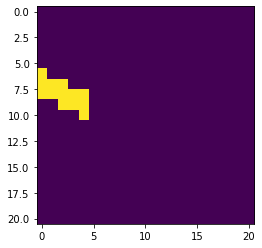

In [59]:
plt.imshow(cond[:,:,0,0])

In [44]:
pv_rate[3]

19.4

In [36]:
dfr.shape

(21, 21, 21, 21, 20)

In [34]:
list(frs.shape)

[21, 21, 21, 21, 20]

In [30]:
frs.shape

(21, 21, 21, 21, 20)

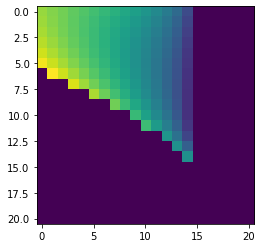

In [33]:
plt.imshow(frs[:,:,0,0,19])

In [23]:
frs[np.array([0,0,0,0,0])] = 1

In [24]:
frs[0,0,0,0,5]

1.0

In [26]:
arr = np.zeros(10)

In [27]:
map(lambda i, j: arr[i] = j, zip([1,2,3], [4,5,6]))

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-27-25c1ddc3278d>, line 1)

In [7]:
frs.shape

(21, 21, 21, 21, 20)

In [86]:
dfr = frs - pv_rate.reshape([1,1,-1])
dfr[frs == 0] = np.nan

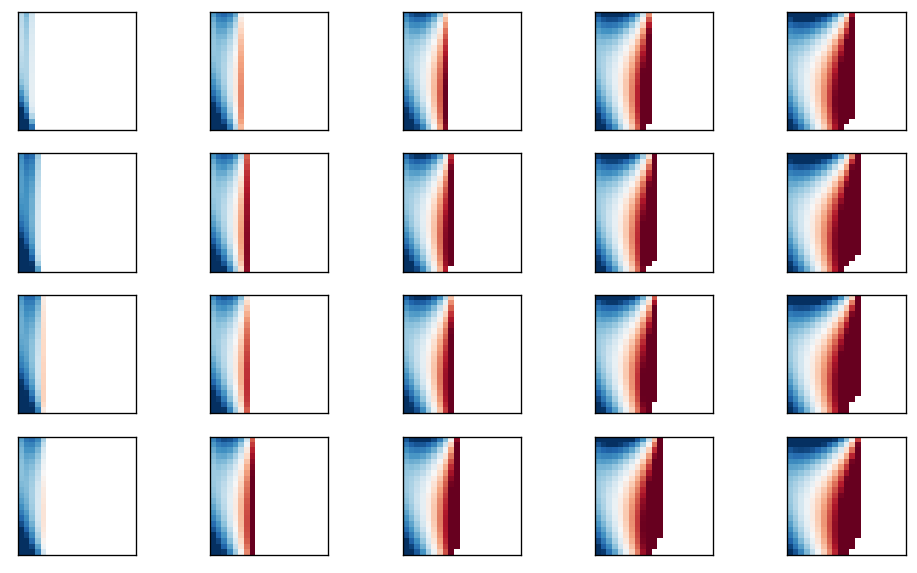

In [92]:
# r = [20, 10]/

fig, axs = plt.subplots(4, 5, dpi=120, figsize=(10, 6))

for n in range(20):
    i = n//4
    j = n%4
    plt.axes(axs[j][i])
    plt.imshow(dfr[:,:,n], cmap="RdBu", vmax=30, vmin=-30)
    plt.xticks([])
    plt.yticks([])
plt.show()

# for i,n in enumerate(range(0,20,2)):
#     plt.axes(axs[i])
#     plt.imshow(dfr[:,:,n], cmap="RdBu", vmax=30, vmin=-30)
#     # plt.plot(r[0], r[1], 'ko')
#     plt.colorbar()

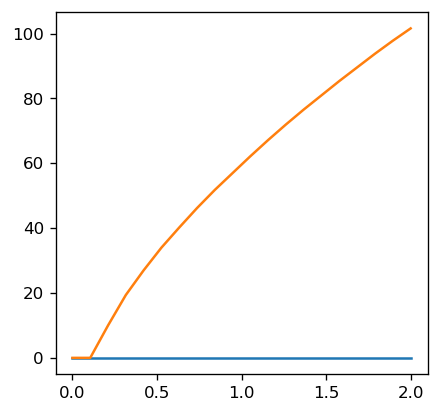

In [78]:
plt.figure(dpi=120, figsize=(4,4))
plt.plot(ics, frs[r[1],r[0],:])
plt.plot(ics, pv_rate)
plt.show()

In [34]:
def read_firing_rate(fname):
    firing_rates = []
    xs = [[], [], []]
    count = 0
    with open(fname, "r") as fp:
        line = fp.readline()
        while line:
            tmp = line.split(":")
            x1,x2,x3 = [float(x) for x in tmp[0].split(",")]
            val = float(tmp[1][:-1])
            firing_rates.append(val)
            line = fp.readline()
            
            xs[0].append(x1)
            xs[1].append(x2)
            xs[2].append(x3)
    xs = [np.unique(x) for x in xs]
    firing_rates = np.reshape(firing_rates, [len(d) for d in xs])
    return firing_rates, xs

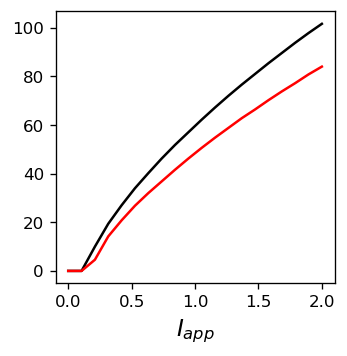

In [68]:
# control params: cm, gk, iapp
fr_pv, xs_pv = read_firing_rate("./pv_firing_rate_mpi.txt")
fr, xs = read_firing_rate("./firing_rate_mpi.txt")

# sample
%matplotlib inline
plt.figure(dpi=120, figsize=(3,3))
plt.plot(xs_pv[2], fr_pv[0,0,:], 'k')
plt.plot(xs[2], fr[12,19,:], c='r')
plt.xlabel(r"$I_{app}$", fontsize=14)
plt.show()

In [114]:
xs[1][nid[1]]

13.473684

1.289474 11.894737


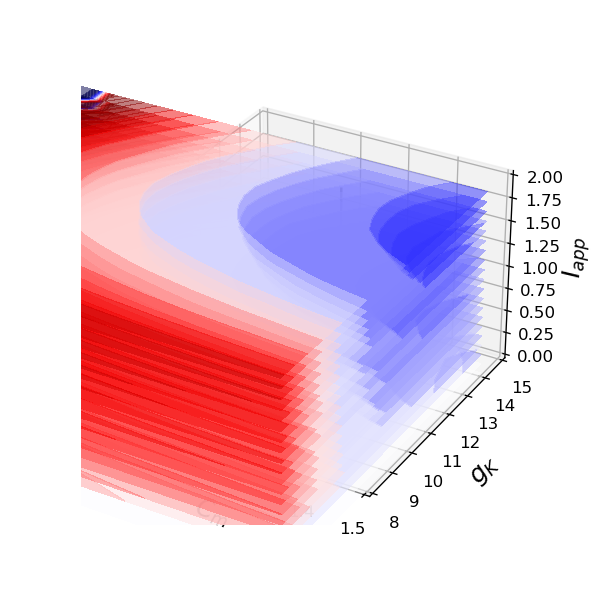

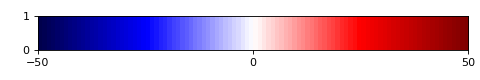

In [136]:
dfr = fr - fr_pv
cl = [-50, 50]
nid = [15, 15]

%matplotlib ipympl
x, y = np.meshgrid(xs[0], xs[1])

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')

for n in range(20):
    ax.contourf(x, y, dfr[:,:,n], 30, zdir='z', offset=xs[2][n], cmap='seismic', vmax=cl[1], vmin=cl[0], alpha=0.5)
# ax.set_zlim([0., 1.])
# ax.plot([1.5,1.5],[14,14], [0,2], c='k', lw=2)

x0, x1 = xs[0][nid[0]], xs[1][nid[1]]
ax.plot([x0, x0], [x1, x1], [-0.1, 2.1], c='k', lw=1.5)
print(x0, x1)

ax.set_zlim([xs[2][0], xs[2][-1]])
plt.xlabel(r"$C_m$", fontsize=15)
plt.ylabel(r"$g_K$", fontsize=15)
ax.set_zlabel(r"$I_{app}$", fontsize=15)
plt.xlim([1, 1.5])
plt.ylim([8, 15])
plt.show()

plt.figure(dpi=80, figsize=(6, 1))
plt.imshow(np.arange(cl[0], cl[1]).reshape([1, -1]), aspect='auto', extent=[cl[0], cl[1], 0, 1], cmap="seismic")
plt.tight_layout()
plt.xticks([cl[0], 0, cl[1]])
plt.show()

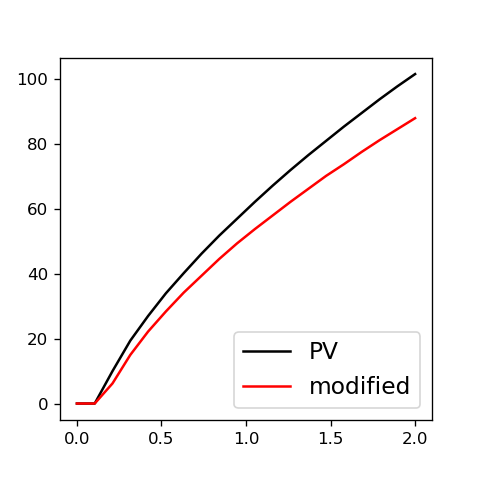

In [146]:
plt.figure(dpi=120, figsize=(4, 4))
plt.plot(xs[2], fr_pv[0,0,:], c='k', label="PV")
plt.plot(xs[2], fr[nid[0],nid[1],:], c='r', label="modified")
plt.legend(loc="lower right" , fontsize=14)
plt.show()

In [69]:
tmp = fr - fr_pv

In [70]:
tmp.shape

(20, 20, 20)

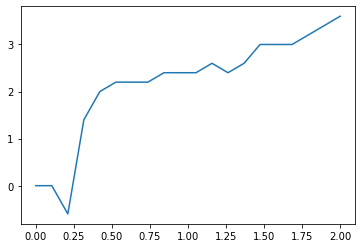

In [76]:
plt.plot(xs[2], tmp[5,15,:])

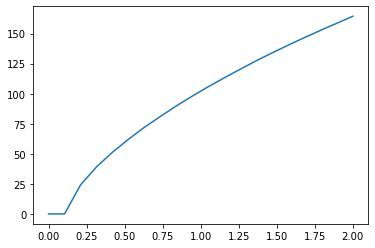

In [50]:
plt.plot(xs[2], fr[0,1,:])

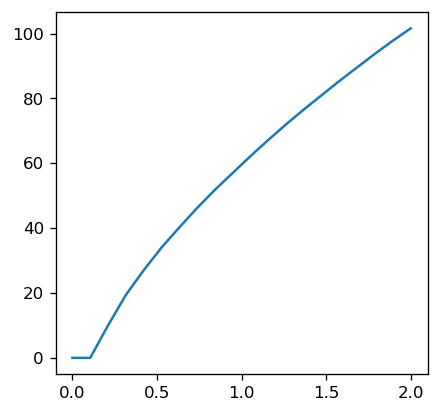

In [42]:
%matplotlib inline
plt.figure(dpi=120, figsize=(4,4))
plt.plot(xs[2], firing_rates[0,0,:])
plt.show()

In [3]:
firing_rates = []
# controlled Cm, gK, iapp


with open("firing_rate_mpi.txt", "r") as fp:
    line = fp.readline()
    while line:
        tmp = line.split(":")
        x1,x2,x3 = [float(x) for x in tmp[0].split(",")]
        val = float(tmp[1][:-1])
        # if val == 0:
        #     val = np.nan
        firing_rates.append(val)
        line = fp.readline()
        
firing_rates = np.reshape(firing_rates, [20,20,20])

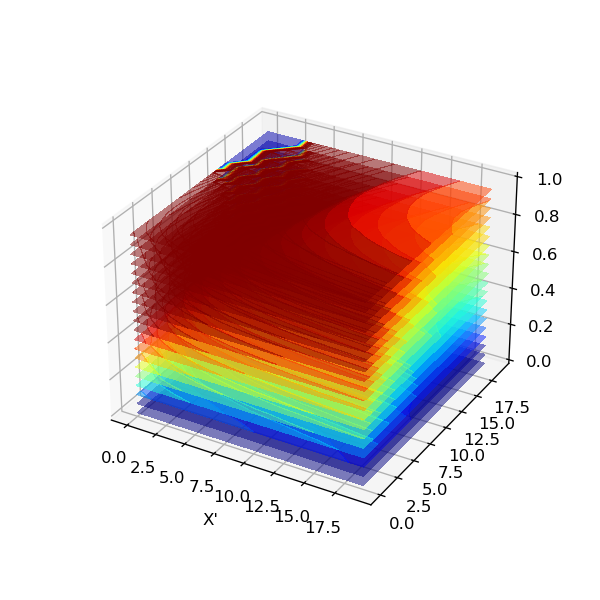

In [16]:
%matplotlib ipympl
x, y = np.meshgrid(np.arange(20), np.arange(20))

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')

for n in range(20):
    ax.contourf(x, y, firing_rates[:,:,n], 30, zdir='z', offset=n/20, cmap='jet', vmax=100, alpha=0.5)
ax.set_zlim([0., 1.])
plt.xlabel("X'")
plt.show()

In [5]:
print("a")

a


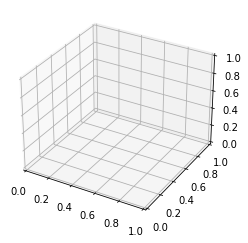

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

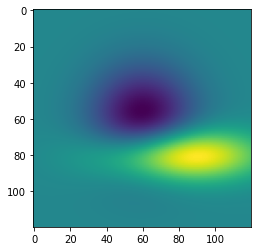

In [12]:
plt.imshow(Z)

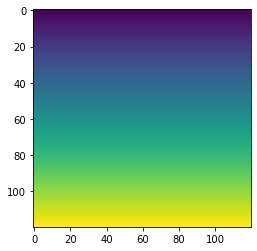

In [11]:
plt.imshow(Y)

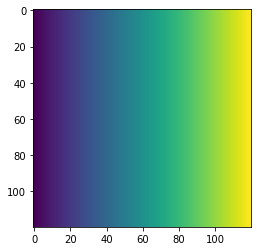

In [10]:
plt.imshow(X)

ValueError: Argument Z must be 2-dimensional.

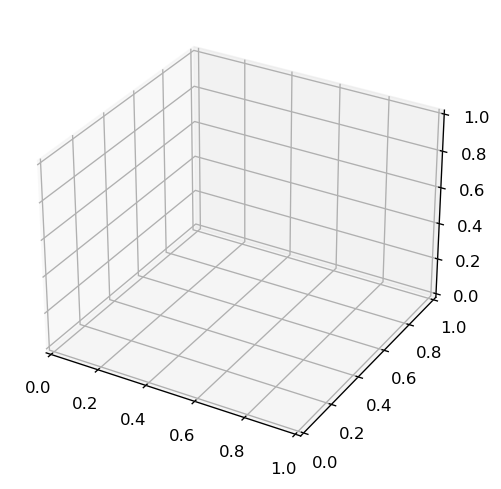

In [6]:
x, y = np.meshgrid(np.arange(20), np.arange(20))

ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')
ax.plot_surface(x, y, firing_rates)

In [ ]:
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

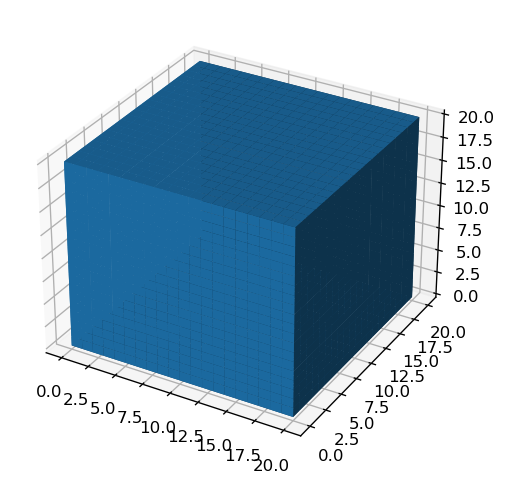

In [39]:
ax = plt.figure(dpi=120, figsize=(5,5)).add_subplot(projection='3d')
# plt.imshow(firing_rates[:,:,3])
ax.voxels(firing_rates)
plt.show()

In [ ]:
ax.

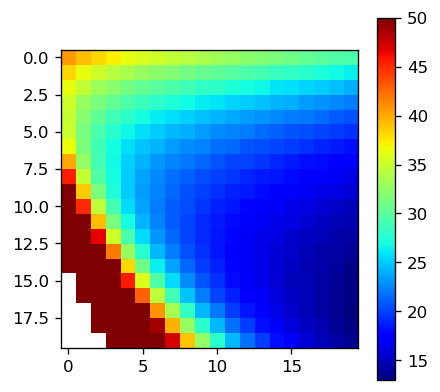

In [34]:
plt.figure(dpi=120, figsize=(4,4))
plt.imshow(firing_rates[:,:,3], cmap="jet", vmax=50)
plt.colorbar()

In [6]:
x1

1.5